*Remarques :* kwarg `newline` pour éviter les problèmes avec`CRLF` , si besoin `reader.__next__ ()` : pour sauter une ligne lors de la lecture

# IMPORT FICHIER TEXTE CLASSIQUE

Dans l'exemple ci-dessous on transfere le contenu d'un fichier texte ligne par ligne dans une liste.  


Chaque ligne se finit par un caractère de saut de ligne, d'où le saut de ligne lors du print : 

In [2]:
L = []
with open('./listes_de_mots/gutemberg.txt', encoding='utf-8') as f:
    for line in f:
        L.append(line)
print(L[4811])
print(len(L[4811]))
print('------------------')

administres

12
------------------


On peut facilement y remédier lors de la construction de la liste L en copiant la ligne privée des éventuels sauts de ligne et espaces situés en fin de chaîne de caractères (grâce à la méthode <code>.rstrip()</code>) :

In [5]:
L = []
with open('./listes_de_mots/gutemberg.txt', encoding='utf-8') as f:
    for line in f:
        L.append(line.rstrip())    #<--------------------   remarquer le changement sur cette ligne de code
print(L[4811])
print(len(L[4811]))
print('------------------')

administres
11
------------------


# Prénoms

<a id="prenoms"></a>
[Vers la notice](#notice_prenoms)

Nous allons utiliser en exemple le fichier csv des attributions de prenoms.

https://www.insee.fr/fr/statistiques/2540004#consulter

Le premier fichier national comporte 636 474 enregistrements et quatre variables décrites ci-après.  

Ce fichier est trié selon les variables SEXE, PREUSUEL, ANNAIS.  
- Nom : SEXE - intitulé : sexe - Type : caractère - Longueur : 1 - Modalité : 1 pour masculin, 2 pour féminin
- Nom : PREUSUEL - intitulé : premier prénom - Type : caractère - Longueur : 25
- Nom : ANNAIS - intitulé : année de naissance - Type : caractère - Longueur : 4 - Modalité : 1900 à 2018, XXXX
- Nom : NOMBRE - intitulé : fréquence - Type : numérique - Longueur : 8

En version tableur :

![capture d'ecran du fichier csv](.\images\csv_prenoms.jpg)

En version texte :

![capture d'ecran du fichier csv](.\images\csv_prenoms_texte.jpg)

    
 **Attention** aux cas où Année = "XXXX" (voir notice)
 
 
 On peut assez facilement faire un import sans prendre en compte le rôle particulier de la ligne d'en-tête. Pour cela on ouvre le fichier puis on crée un objet <code>reader</code>. La fonction ci-dessous n'est pas à savoir refaire : il suffit de la fournir aux élèves si besoin ... Les deux seules choses à modifier avant de l'utiliser sont :
 - l'encodage (en ouvrant votre fichier dans Notepad++ par exemple, vous aurez son encodage et vous pourrez même convertir l'encodage en utf-8 si besoin),
 - le délimiteur : la capture d 'écran ci-dessus nous montre que le délimiteur est bien le point virgule.


**Dans tous les cas avant d'importer un fichier csv dans python, il apparait nécessaire de l'éditer dans Notepad++ pour vérifier son encodage et son délimiteur ...**

In [4]:
import csv
def charger_fichier( nom_fic ):
    """
    Permet de lire un fichier CSV sans utiliser la ligne d'en-tête
    """
    lignes = [] 
    with open( nom_fic ,"r", newline ="", encoding ="utf -8") as csvfile :
        lecteur = csv.reader ( csvfile , delimiter =";")
        for enreg in lecteur : 
            lignes.append (enreg)
    return lignes

ma_liste = charger_fichier("./prenoms/nat2018.csv")

In [5]:
print(ma_liste[0])
print(ma_liste[1])
print(ma_liste[2])
print(ma_liste[16])

['sexe', 'preusuel', 'annais', 'nombre']
['1', 'A', '1980', '3']
['1', 'A', '1998', '3']
['1', 'AADEL', '1987', '5']


**Remarque : Attention, les éléments de la liste sont des chaînes de caractères !**   

<div class="alert alert-info">
**Exercice :**  
En utilisant la liste des enregistrements, écrire une fonction <code>extraire_donnees_prenom</code> qui prend la liste des enregistrements, le sexe et un prénom en argument et retourne deux listes **de même longueur** :

- la liste des années pour lesquelles ce prénom est attribué (sauf si l'année est 'XXXX')
- la liste des effectifs  corerspondant aux années où ce prénom a été attribué (sauf si l'année est 'XXXX')

In [6]:
def extraire_prenom(L, sexe, prenom):
    '''
    Affiche le nombre d'attributions du prenom en fonction de l'année
    Retourne le couple ( liste annees, liste effectifs)
    '''
    annees=[]
    effectifs=[]
    # à compléter
    #
    #
    #
    #
    #
    return (annees, effectifs)

On peut alors facilement tracer la courbe d'attributions du prénom :

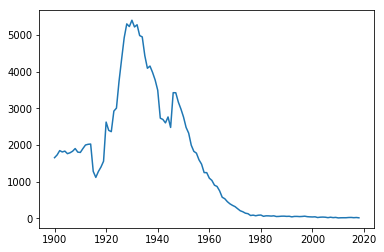

In [11]:
import matplotlib.pyplot as plt


(annees_prenom, effectifs_prenom) = extraire_prenom(ma_liste, '2', 'THéRèSE')
plt.plot(annees_prenom, effectifs_prenom)
plt.show()

# Pour aller plus loin en autonomie : Positions des monuments historiques
<a id="monuments"></a>

https://www.data.gouv.fr/fr/datasets/immeubles-proteges-au-titre-des-monuments-historiques/#_

Imprécision des coordonnées ...


-  0 Appellation courante
-  1 Siecle
-  2 Précision sur la Protection
-  3 Date de Protection
-  4 Statut
-  5 Description
-  6 Historique
-  7 Auteur
-  8 Adresse
-  9 Siecle_format_brut
- 10 Région
- 11 Département
- 12 Commune
- 13 Affectataire
- 14 Niveau de protection
- 15 Adresse1
- 16 Commune1
- 17 Code département
- 18 Ancienne région
- 19 DMAJ
- 20 Référence
- 21 Base
- 22 INSEE
- 23 coordonnees_ban

<div class="alert alert-info">
On pourra étudier le code suivant en autonomie après avoir consulté le contenu du fichier csv utilisé.

In [20]:
import folium
from folium.plugins import MarkerCluster

def selectionner( L ):
    liste_coords = []
    liste_legendes = []
    for monument in L:
        coords_as_string = monument[23]
        try:
            L = coords_as_string.split(',')
            L[0] = float(L[0])
            L[1] = float(L[1])
            liste_coords.append(L)
            liste_legendes.append(monument[0])
        except:
            pass
    return (liste_coords, liste_legendes)

def ajouter_markers_sur_carte( liste_coords, liste_legendes, carte):
    marker_cluster = MarkerCluster().add_to(carte)
    index = 0
    for coord in liste_coords:
        marker = folium.vector_layers.CircleMarker(location=list(coord), popup = liste_legendes[index])
        marker.add_to(marker_cluster)
        index += 1
    return marker_cluster


L = charger_fichier('./monuments/monuments_historiques_gps.csv')
(coords, legendes) = selectionner(L)


In [21]:
ma_carte = folium.Map(location=(45, 0), zoom_start=6)
ajouter_markers_sur_carte( coords, legendes, ma_carte)
folium.LayerControl().add_to(ma_carte) 
ma_carte.save('ma_carte_monuments.html')

# Notice Prénoms

<a id="notice_prenoms"></a>
[Vers le code](#prenoms)

Avertissement

La refonte du processus électoral a entrainé un nombre de corrections dans la base des prénoms plus important que les années précédentes. En effet, chaque électeur est maintenant inscrit au répertoire électoral unique avec son état-civil officiel (celui du Répertoire national d'identification des personnes physiques / RNIPP), des anomalies ont donc été corigées.

Le fichier des prénoms est établi à partir des seuls bulletins de naissance des personnes nées en France (métropole et départements d’outre-mer hors Mayotte). En conséquence, l’exhaustivité n’est pas garantie sur toute la période, notamment pour les années antérieures à 1946. Les utilisateurs pourront donc constater des écarts avec le nombre annuel des naissances évalué par l'Insee. Ces écarts, importants en début de période, vont en s’amenuisant. Après 1946, ils sont peu significatifs.

Les informations contenues dans le fichier des prénoms sont basées sur les bulletins d'état-civil transmis à l’Insee par les officiers d’état civil des communes. Ces bulletins sont eux-mêmes établis à partir des déclarations des parents. L'Insee ne peut garantir que le fichier des prénoms soit exempt d'omissions ou d'erreurs.
Pour comprendre

Pour chaque prénom, il est indiqué pour chaque année de naissance (de 1900 à 2018) et chaque sexe, le nombre de personnes inscrites à l'état civil sous ce prénom. Pour le fichier « DPT2018 », la précision est apportée pour chaque département.

Les personnes prises en compte

Le champ couvre l'ensemble des personnes nées en France hors Mayotte et enregistrées à l'état civil sur les bulletins de naissance. Les personnes nées à l'étranger sont exclues.

Le champ des prénoms retenus

Dans les fichiers de l’état civil, en l'occurrence les bulletins de naissance, les différents prénoms sont séparés par une espace (ou blanc). Ainsi deux prénoms séparés par un tiret constituent un seul prénom composé (exemple : Anne-Laure). Le premier prénom simple ou composé figure en début de liste, et c'est celui qui sera retenu après le traitement de la protection de l'anonymat.

Conditions portant sur les prénoms retenus

    1. Sur la période allant de 1900 à 1945, le prénom a été attribué au moins 20 fois à des personnes de sexe féminin et/ou au moins 20 fois à des personnes de sexe masculin
    2. Sur la période allant de 1946 à 2018, le prénom a été attribué au moins 20 fois à des personnes de sexe féminin et/ou au moins 20 fois à des personnes de sexe masculin
    3. Pour une année de naissance donnée, le prénom a été attribué au moins 3 fois à des personnes de sexe féminin ou de sexe masculin

Les effectifs des prénoms ne remplissant pas les conditions 1 et 2 sont regroupés (pour chaque sexe et chaque année de naissance) dans un enregistrement dont le champ prénom (PREUSUEL) prend la valeur «_PRENOMS_RARES_». Les effectifs des prénoms remplissant la condition 2 mais pas la condition 3 sont regroupés (pour chaque sexe et chaque prénom) dans un enregistrement dont le champ année de naissance (ANNAIS) prend la valeur «XXXX».

Précision pour le département de naissance

Sur toute la période, le département de naissance (variable DPT) est celui existant au moment de la naissance. Ainsi une personne née à Issy-les-Moulineaux en 1949 sera codée en 75 (Seine), et une personne née en 1971 à Issy-les-Moulineaux sera codée en 92 (Hauts-de-Seine).

En effet, de par la loi n° 64-707 du 10/07/1964, il y a eu création des départements 75 (Paris), 78 (Yvelines), 91 (Essonne), 92 (Hauts-de-Seine), 93 (Seine-Saint-Denis), 94 (Val-de-Marne) et 95 (Val-d'Oise), à partir des anciens départements 75 (Seine) et 78 (Seine-et-Oise), avec une date d'effet dans le fichier au 1er janvier 1968.

Deux regroupements de codes ont été faits pour la variable DPT :

    le code DPT=20 est utilisé pour les naissances ayant eu lieu dans les deux départements 2A (Corse-du-Sud) et 2B (Haute-Corse) ;
    le code DPT=97 est utilisé pour les naissances ayant eu lieu en Guadeloupe, en MArtinique, en Guyane et à La Réunion.

Décrets et lois relatifs aux départements métropolitains

    Décret du 18/01/1955 : la Seine-Inférieure devient Seine-Maritime (76)

    Décret du 09/03/1957 : la Loire-Inférieure devient Loire-Atlantique (44)

    Loi n° 64-707 du 10/07/1964 : création des départements 75 (Paris), 78 (Yvelines), 91 (Essonne), 92 (Hauts-de-Seine), 93 (Seine-Saint-Denis), 94 (Val-de-Marne) et 95 (Val-d'Oise)

    Décret du 10/10/1969 : les Basses-Pyrénées deviennent Pyrénées-Atlantiques (64)

    Décret du 13/04/1970 : les Basses-Alpes deviennent Alpes-de-Haute-Provence (04)

    Loi n° 75-356 du 15/05/1975 : création des départements 2A (Corse-du-Sud) et 2B (Haute-Corse)

    Décret du 27/02/1990 : les Côtes-du-Nord deviennent Côtes-d'Armor (22)

Éléments de contexte sur le choix des prénoms

Il n'existe pas de liste de prénoms autorisés. Les prénoms connus étrangers ou certains diminutifs peuvent ainsi être choisis. En conséquence, on peut trouver par exemple des prénoms à une seule lettre dans le fichier des prénoms. Ce sont effectivement les parents qui choisissent librement le ou les prénoms de l’enfant lors de la déclaration de naissance. En particulier depuis 1993, l’officier d’état civil ne peut plus refuser le prénom choisi par les parents. Il peut toutefois avertir le procureur de la République s’il estime que le prénom nuit à l’intérêt de l’enfant (exemple : prénom ridicule ou grossier) ; ou que le prénom méconnaît le droit d’un tiers à voir protéger son nom de famille (exemple : un parent ne peut choisir comme prénom le nom de famille d’une autre personne dont l’usage constituerait une usurpation). Le procureur peut ensuite saisir le juge aux affaires familiales qui peut demander la suppression du prénom sur les registres de l’état civil. Dans ce cas le prénom serait également supprimé du fichier des prénoms.

L'alphabet utilisé pour l’écriture des prénoms doit être celui qui sert à l'écriture du français. Les caractères alphabétiques qui ne sont pas utilisés dans la langue française ne sont donc pas autorisés (par exemple le « ñ » ou le « ș » ). Ainsi, par exemple, le prénom d'origine roumaine "Rareș" apparaît en tant que "RARES" dans le fichier des prénoms.
Sources

Une présentation générale de la source état civil est accessible dans la rubrique « Définitions, méthodes et qualité » du site insee.fr.


<div class="alert alert-danger">
## CORRECTION

In [10]:
import matplotlib.pyplot as plt

def extraire_prenom(L, sexe, prenom):
    '''
    Affiche le nombre d'attributions du prenom en fonction de l'année
    Retourne le couple ( liste annees, liste effectifs)
    '''
    annees=[]
    effectifs=[]
    prenom = prenom.upper()
    for enregistrement in L:
        if enregistrement[0] == sexe and enregistrement[1] == prenom:
            if enregistrement[2] != 'XXXX':
                annees.append(int(enregistrement[2]))
                effectifs.append(int(enregistrement[3]))
    return (annees, effectifs)
